### Assignment 3 - Hamed Ahmadinia

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [1]:
#  we want to use the Pandas and Numpy module in our working path. We Just import them with the following command

import pandas as pd
import numpy as np

In [2]:
# reading CSV file entitled "sonar.all-data" and save the data in "data"
# there was no headers and we set them as "header = None", which means python would assign a series of numbers
# starting from 0 to as column names. 
# we are setting v as prefix which tells python to include this keyword before each column name.

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None, prefix='v')
data["y"] = 0

# we used data.loc to access a group of rows and columns by label(s)
# droping our target coloumn v60 
data.loc[data.v60=='M', 'y'] = 1

# droping our target coloumn v60 
data.drop('v60', axis=1, inplace=True)

# showing 10 first raw in data
data.head(10)

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v51,v52,v53,v54,v55,v56,v57,v58,v59,y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,0
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,0
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,0
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,0


In [4]:
# checking Return the dimensionality of the DataFrame
data.shape

(208, 61)

In [5]:
# importing sklearn, C-Support Vector Classification
from sklearn.svm import SVC

# Exhaustive search over specified parameter values for an estimator
from sklearn.model_selection import GridSearchCV, train_test_split

# making traning and test sets by spliting data 
xtrain, xtest, ytrain, ytest = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2)

In [7]:
# The parameter grid to explore, as a dictionary mapping estimator parameters to sequences of allowed values.

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

grid = GridSearchCV(SVC(kernel='sigmoid'),param_grid,refit=True,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [8]:
# Build a text report showing the main classification metrics.

from sklearn.metrics import classification_report

print(classification_report(ytest, grid.predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65        18
           1       0.73      0.79      0.76        24

    accuracy                           0.71        42
   macro avg       0.71      0.70      0.70        42
weighted avg       0.71      0.71      0.71        42



In [9]:
scores=grid.cv_results_['mean_test_score'].reshape(4,4)

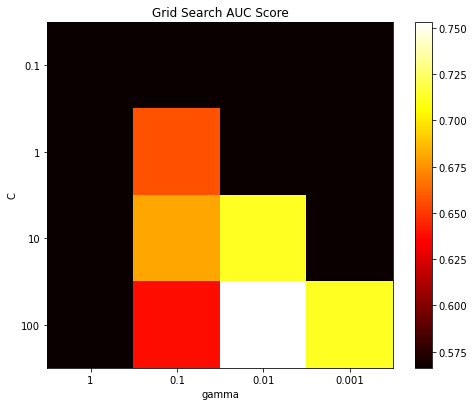

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.ylabel('C')
plt.xlabel('gamma')
plt.colorbar()
plt.yticks(np.arange(4), [0.1,1, 10, 100])
plt.xticks(np.arange(4), [1,0.1,0.01,0.001])
plt.title('Grid Search AUC Score')
plt.show()

In [10]:
grid.best_estimator_

SVC(C=100, gamma=0.01, kernel='sigmoid')

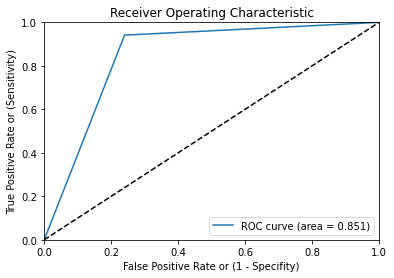

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(ytest, grid.predict(xtest))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

In [17]:
# reading excel file entitled "CTG.xls" and save the data in "data"

data = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls", 'Raw Data')
data = data.iloc[:,3:]

# showing 10 first raw in data
data.head(10)

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,0.0,953.0,134.0,134.0,1.0,0.0,10.0,26.0,5.9,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,240.0,953.0,134.0,134.0,1.0,0.0,9.0,29.0,6.3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,62.0,679.0,122.0,122.0,0.0,0.0,0.0,83.0,0.5,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,120.0,779.0,122.0,122.0,0.0,0.0,1.0,84.0,0.5,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [18]:
# checking Return the dimensionality of the DataFrame
data.shape

(2130, 37)

In [19]:
# checking NA data
data.dropna().shape

(2126, 37)

In [20]:
# droping NA data from our dataframe
data = data.dropna()

In [21]:
# making traning and test sets by spliting data 

xtrain, xtest, y1train, y1test = train_test_split(data.iloc[:, :-2], data[["CLASS"]], test_size=0.2)
y2test = data.loc[y1test.index, 'NSP']
y2train = data.loc[y1train.index, 'NSP']

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

# Find the best two models by creating a complete pipeline with different parameters and algorithms. 
# One model should predict the morphologic pattern and the other the fetal state.

scaler = StandardScaler()
pca = PCA(n_components=30)
svc = SVC(kernel='sigmoid', class_weight='balanced')
# model = make_pipeline(scaler, pca, svc)
model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=30)),
    ('svm', SVC(kernel='sigmoid', class_weight='balanced'))
])

%time model.fit(xtrain, y2train)
print(classification_report(y2test, model.predict(xtest)))

Wall time: 131 ms
              precision    recall  f1-score   support

         1.0       0.97      0.90      0.93       347
         2.0       0.85      0.88      0.87        52
         3.0       0.40      0.78      0.53        27

    accuracy                           0.89       426
   macro avg       0.74      0.85      0.78       426
weighted avg       0.92      0.89      0.90       426



In [24]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
scaler1 = StandardScaler()
pca1 = PCA(n_components=30) 
model1 = make_pipeline(scaler1, pca1, forest)

model1.fit(xtrain, y1train)

# Comment on the time and preformance metrics used in each model.
print(classification_report(y1test, model1.predict(xtest)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        71
         2.0       1.00      1.00      1.00       105
         3.0       1.00      1.00      1.00        15
         4.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00        17
         6.0       1.00      1.00      1.00        80
         7.0       1.00      1.00      1.00        68
         8.0       1.00      1.00      1.00        23
         9.0       1.00      1.00      1.00         5
        10.0       1.00      1.00      1.00        28

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

